<img src="image-20240503-124355.png" width="" align="" />

# Fase 1: Comprendiendo el negocio

Valve es una compañía de videojuegos que quiere saber qué tan probable es que, en Counter Strike, debido a diversos factores puedas ganar las partidas y, además, saber cual son las decisiones mas populares o por cuales se decantan mas los jugadores. Y así llegar a conclusiones basadas en datos históricos dados por partidas

Se nos pidió realizar un análisis exhaustivo de distintas partidas de Counter Strike con las cuales se puedan predecir resultados como por ejemplo:

¿Cuál es la probabilidad de que el mapa influya en el resultado de la partida dependiendo del lado asignado al equipo(Terrorist/CounterTerrorist)?

Además de esta pregunta inicial igual podríamos indagar levemente en :

- ¿ Qué categoría de arma tiene un mejor desempeño en la partida ?
- ¿ Qué bando gana mas ? 

 ¿ De qué lado se producen mas HeadShots?
- ¿ Qué categoría de arma es mas popular entre los jugadores ?
- ¿ Cuál es el gasto medio entre distintas rondas ?

Para esto haremos uso de un modelo el cual prediga o conjeture, en un alto nivel de precisión, los resultados de las siguientes partidas basándose en los datos o información entregada por el dataset.

Las columnas que formará este dataset se comprenden como :

# Fase 2: Comprender los datos

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

Vamos a importar las librerías que usaremos para llegar a la solución

In [ ]:
df_2 = _deepnote_execute_sql('SELECT *\nFROM \'Anexo ET_demo_round_traces.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_2

,column00,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79152,123775,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,...,0,0,0,0,5600,27100,4,0,2,2
79153,123776,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,...,1,0,1,0,5500,27100,8,5,1,3
79154,123777,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,...,0,0,0,0,4950,27100,5,0,2,3
79155,123778,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,...,0,0,0,0,4950,27100,1,0,1,0


In [ ]:
df = pd.read_csv("Anexo ET_demo_round_traces.csv", sep=";")

/tmp/ipykernel_254/38193952.py:1: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Anexo ET_demo_round_traces.csv", sep=";")


La siguiente función nos mostrará en detalle la media y los percentiles de cada columna

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,79157.0,60570.193640,36436.598386,600.0,30830.0,56720.0,90639.0,123779.0
InternalTeamId,79157.0,1.500006,0.500003,1.0,1.0,2.0,2.0,2.0
MatchId,79157.0,250.525033,149.557804,4.0,128.0,236.0,373.0,511.0
RoundId,79157.0,12.765517,7.432837,1.0,6.0,12.0,19.0,36.0
RLethalGrenadesThrown,79157.0,0.498667,0.597985,0.0,0.0,0.0,1.0,4.0
RNonLethalGrenadesThrown,79157.0,1.258057,1.184909,0.0,0.0,1.0,2.0,6.0
PrimaryAssaultRifle,79157.0,0.675363,0.464125,0.0,0.0,1.0,1.0,1.0
PrimarySniperRifle,79157.0,0.089840,0.279797,0.0,0.0,0.0,0.0,1.0
PrimaryHeavy,79157.0,0.005964,0.075497,0.0,0.0,0.0,0.0,1.0
PrimarySMG,79157.0,0.007046,0.082453,0.0,0.0,0.0,0.0,1.0


La función a continuación nos ayudará a comprender con que tipos de datos estamos tratando, así como los nombres de cada atributo

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157 non-null  object 
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

Aquí representamos las primeras 5 rondas, lo que podemos observar es que en este punto de la partida existe menos actividad en lo que refiere a MatchHeadshots, MatchKills, y MatchAssists, esto puede deberse a que se encuentran en una fase temprana del juego y que poseen poco dinero como se muestra en TeamStartingEquipmentValue

In [ ]:
df.query('RoundId<5')

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79142,123765,de_mirage,CounterTerrorist,2,511,4,False,False,True,False,...,0,0,0,0,5500,26700,4,0,2,2
79143,123766,de_mirage,CounterTerrorist,2,511,4,False,False,True,False,...,3,1,0,3,5500,26700,7,5,1,2
79144,123767,de_mirage,CounterTerrorist,2,511,4,False,False,True,False,...,2,1,0,0,4650,26700,5,0,2,3
79145,123768,de_mirage,CounterTerrorist,2,511,4,False,False,True,False,...,0,0,0,0,4950,26700,1,0,1,0


A diferencia de la anterior query, podemos observar que la actividad se dispara, se encuentran gran cantidad de datos en las variables mencionadas anteriormente y como análisis cabe la posibilidad de que se deba a que se ubican en un punto tardío de la partida y tienen una mayor cantidad de dinero

In [ ]:
df.query('RoundId>30')

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
4899,6940,de_mirage,CounterTerrorist,1,29,31,False,True,True,False,...,0,0,0,0,5500,22650,19,1,3,7
4900,6941,de_mirage,CounterTerrorist,1,29,31,False,True,True,False,...,0,0,0,0,5150,22650,24,7,7,15
4901,6942,de_mirage,CounterTerrorist,1,29,31,False,True,False,False,...,1,0,0,1,5500,22650,19,2,3,11
4902,6943,de_mirage,CounterTerrorist,1,29,31,False,True,False,False,...,3,0,3,1,2050,22650,19,5,4,12
4903,6944,de_mirage,CounterTerrorist,1,29,31,False,True,True,False,...,1,0,1,0,4450,22650,19,6,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68342,109705,de_dust2,Terrorist,2,451,31,False,False,True,False,...,1,0,0,0,6850,27250,25,2,6,2
68343,109706,de_dust2,Terrorist,2,451,31,False,False,False,False,...,2,0,1,0,4800,27250,22,5,5,14
68344,109707,de_dust2,Terrorist,2,451,31,False,False,True,False,...,2,0,1,1,5200,27250,20,5,7,10
68345,109708,de_dust2,Terrorist,2,451,31,False,False,False,False,...,0,1,0,0,5200,27250,19,2,4,6


La línea a continuación representa todos aquellos valores nulos que se deben corregir dentro del dataset

In [ ]:
df.isna().sum()

Unnamed: 0                     0
Map                            0
Team                           2
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    1
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
TravelledDistance              0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int


El Siguiente código nos muestra una media del dinero que se va gastando por ronda

In [ ]:
gastomedio = df[df['RoundId'] == 5]['RoundStartingEquipmentValue'].mean()
gastomedioo = round(gastomedio,1)
print(gastomedioo)

4167.0


En estas líneas de código como podemos observar la categoría de los rifle de asalto son las preferidas por los jugadores, posiblemente debido a su precio y rendimiento dentro de la partida

In [ ]:
counts = (
    ("Rifles", df.query('PrimaryAssaultRifle != 0')['PrimaryAssaultRifle'].count()),
    ("Pistolas", df.query('PrimaryPistol != 0')['PrimaryPistol'].count()),
    ("Rifles francotirador", df.query('PrimarySniperRifle != 0')['PrimarySniperRifle'].count()),
    ("Subfusiles", df.query('PrimarySMG != 0')['PrimarySMG'].count()),
    ("Armas pesadas", df.query('PrimaryHeavy != 0')['PrimaryHeavy'].count())
)

sorted_counts = sorted(counts, key=lambda x: x[1], reverse=True)

for label, count in sorted_counts:
    print(f"{label}: {count}")

Rifles: 55364
Pistolas: 17556
Rifles francotirador: 9570
Subfusiles: 656
Armas pesadas: 561


El código nos proporciona los datos sobre que equipo ha obtenido mayor tasa de victorias, arrojándonos que los Terroristas tienen más victorias

In [ ]:
partidas_Ganadas = df.groupby('Team')['MatchWinner'].sum()
print(partidas_Ganadas)

Team
CounterTerrorist    17560
Terrorist           19578
Name: MatchWinner, dtype: object


Con este código se puede visualizar cual es el equipo con mas tasa de disparos en la cabeza

Equipo con el mayor porcentaje de headshots: CounterTerrorist
                  MatchKills  MatchHeadshots  HeadshotPorcentaje
Team                                                            
CounterTerrorist      340111          154987           45.569535
Terrorist             333638          150438           45.090188
/tmp/ipykernel_254/3210133004.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=totals.index, y='HeadshotPorcentaje', data=totals, palette=colors)


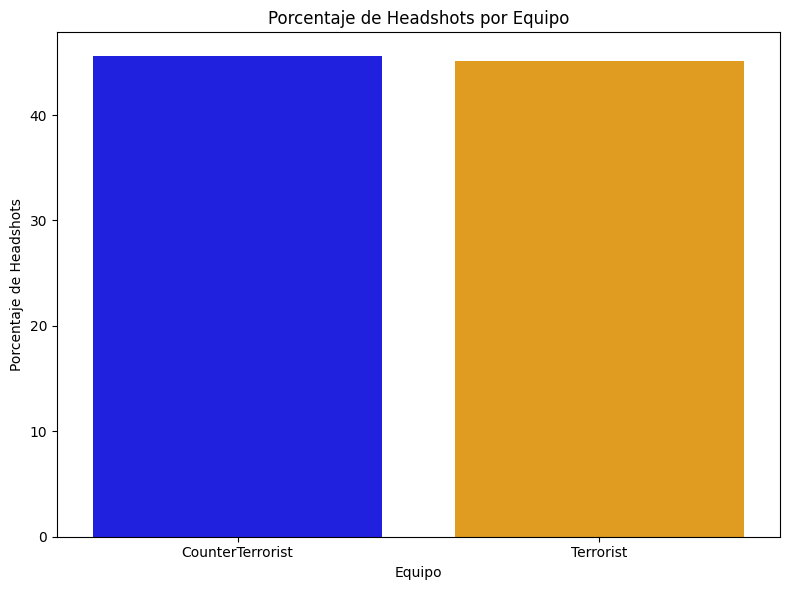

In [ ]:

totals = df.groupby('Team')[['MatchKills', 'MatchHeadshots']].sum()
totals['HeadshotPorcentaje'] = (totals['MatchHeadshots'] / totals['MatchKills']) * 100
equipo_con_mas_headshots = totals['HeadshotPorcentaje'].idxmax()
print("Equipo con el mayor porcentaje de headshots:", equipo_con_mas_headshots)
print(totals)

plt.figure(figsize=(8, 6))
plt.title('Porcentaje de Headshots por Equipo')

# Establecer el color naranja para terroristas y azul para antiterroristas
colors = {'Terrorist': 'orange', 'CounterTerrorist': 'blue'}

sb.barplot(x=totals.index, y='HeadshotPorcentaje', data=totals, palette=colors)

plt.xlabel('Equipo')
plt.ylabel('Porcentaje de Headshots')
plt.tight_layout()
plt.show()


Para empezar con la pregunta primero hay que saber cual es el bando que gana más en cada mapa, el siguiente Código es una estadística en la cual se puede visualizar la pregunta

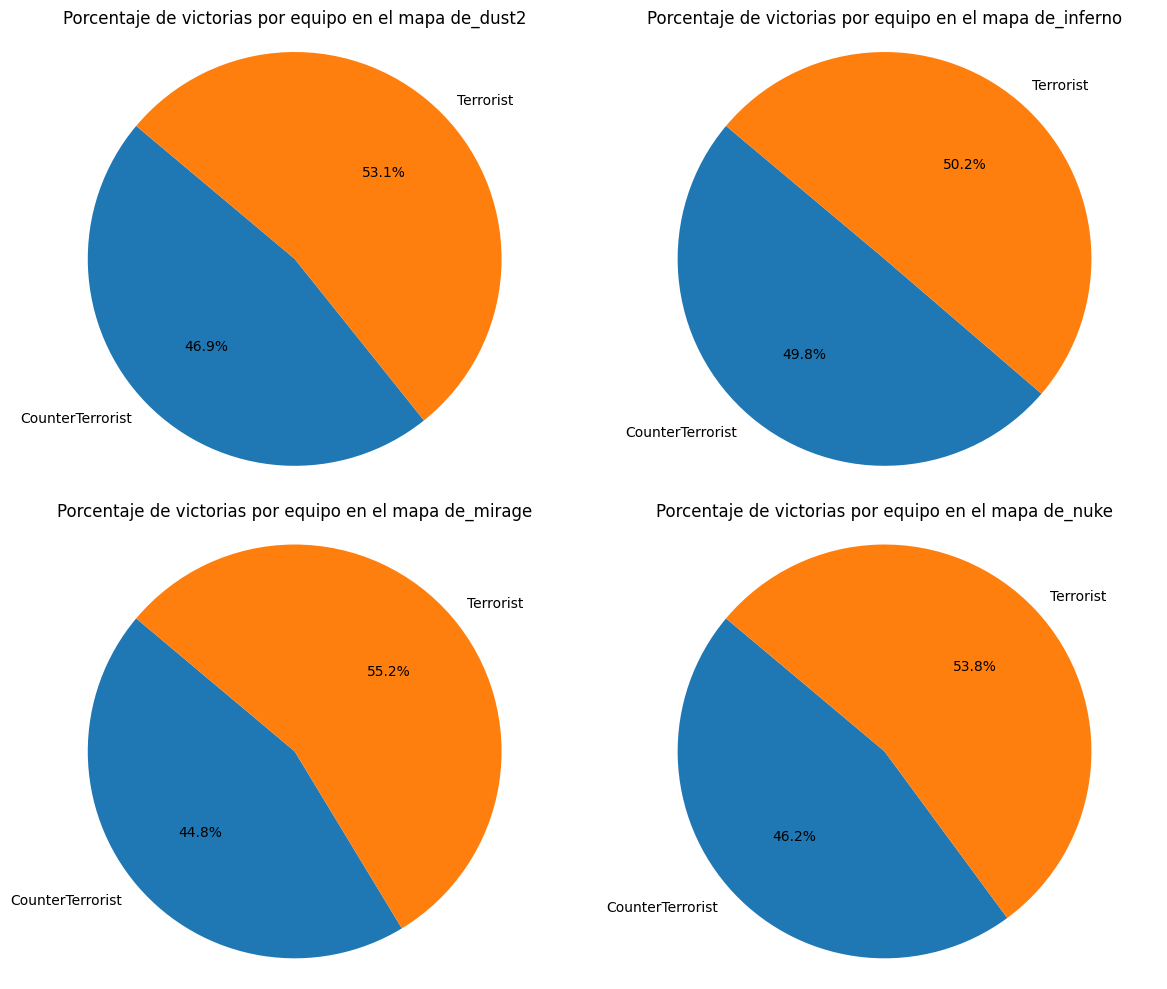

In [ ]:

match_counts = df.groupby(['Map', 'Team'])['MatchId'].nunique().unstack()

win_counts = df.groupby(['Map', 'Team'])['MatchWinner'].apply(lambda x: (x == 1).sum()).unstack()

porcentaje_victoria = (win_counts / match_counts) * 100

winrate = porcentaje_victoria / 100

winrate_map = winrate.round(2)

winrate_map = winrate.round(2).apply(lambda x: x.map(lambda y: "{:.2f}%".format(y)))

mapas = ['de_dust2', 'de_inferno', 'de_mirage', 'de_nuke']

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i, mapa in enumerate(mapas):
    data_mapa = winrate_map.loc[mapa]
    data_plot = data_mapa.str.rstrip('%').astype(float)
    ax = axs[i // 2, i % 2]
    ax.pie(data_plot, labels=data_plot.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f"Porcentaje de victorias por equipo en el mapa {mapa}")
    ax.axis('equal') 

plt.tight_layout()
plt.show()

equipo_mas_ganador_por_mapa = win_counts.idxmax(axis=1)


#print(equipo_mas_ganador_por_mapa)
#print(winrate_map)

Al visualizar los siguientes gráficos, los terroristas ganan mas en todos los mapas, por lógica si ganan mas debería ser porque poseen mas asesinatos, el siguiente Código se podrá visualizar cual es el equipo con mas bajas en sus respectivos mapas.

Team        CounterTerrorist  Terrorist
Map                                    
de_dust2               79830      80861
de_inferno            125434     121937
de_mirage              81320      79549
de_nuke                53527      51291
/tmp/ipykernel_254/1027861309.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=kills_counts_mapa.index, y=kills_counts_mapa.values, palette=[colores_equipos[team] for team in kills_counts_mapa.index])


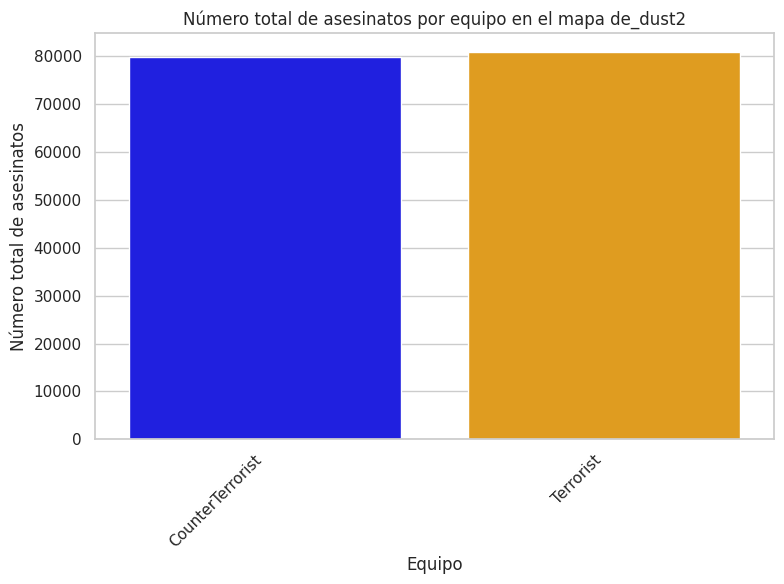

/tmp/ipykernel_254/1027861309.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=kills_counts_mapa.index, y=kills_counts_mapa.values, palette=[colores_equipos[team] for team in kills_counts_mapa.index])


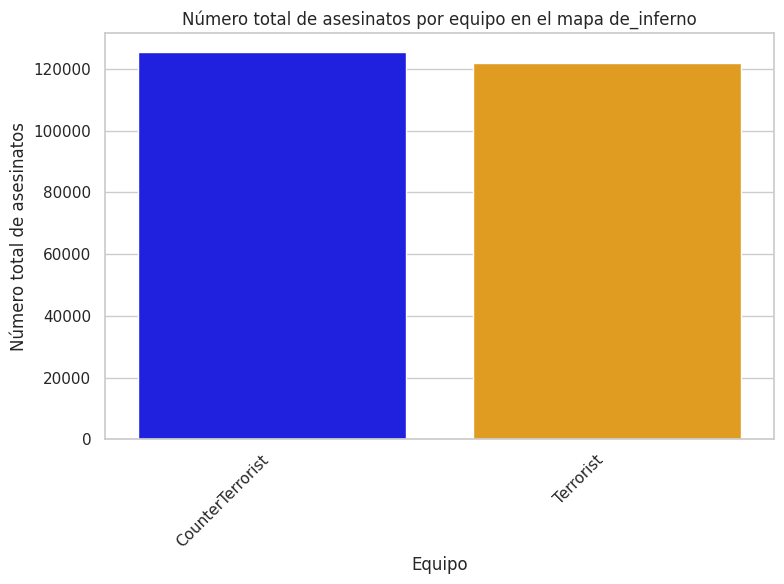

/tmp/ipykernel_254/1027861309.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=kills_counts_mapa.index, y=kills_counts_mapa.values, palette=[colores_equipos[team] for team in kills_counts_mapa.index])


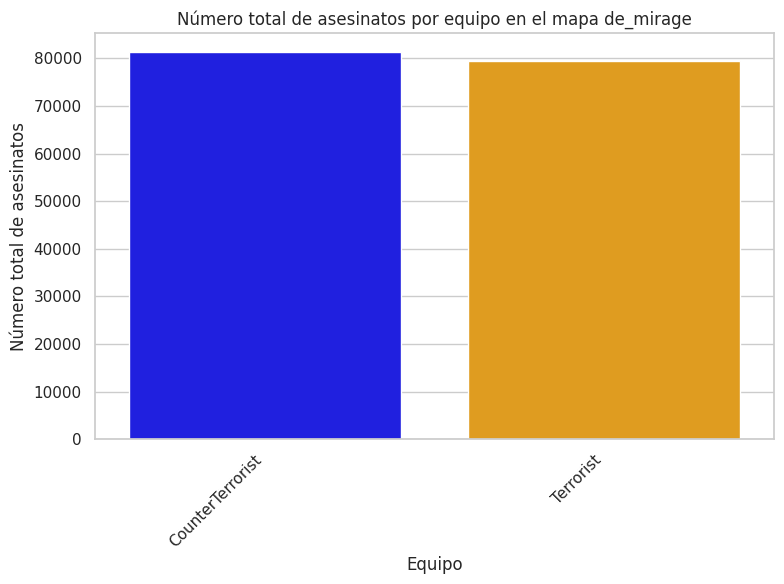

/tmp/ipykernel_254/1027861309.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=kills_counts_mapa.index, y=kills_counts_mapa.values, palette=[colores_equipos[team] for team in kills_counts_mapa.index])


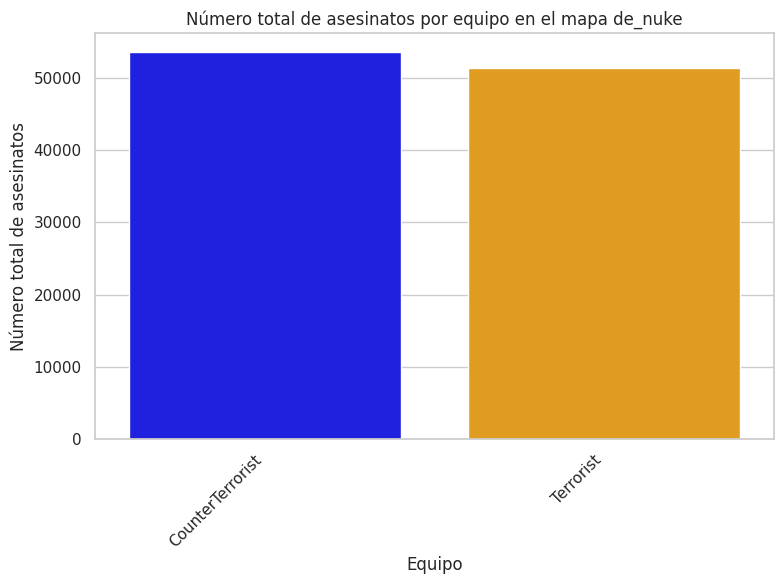

In [ ]:

# Calcular el total de asesinatos para cada equipo en cada mapa
kills_counts = df.groupby(['Map', 'Team'])['MatchKills'].sum().unstack()

print(kills_counts)

sb.set(style="whitegrid")

mapas = ['de_dust2', 'de_inferno', 'de_mirage', 'de_nuke']

# Definir un esquema de color personalizado para los equipos
colores_equipos = {'Terrorist': 'orange', 'CounterTerrorist': 'blue'}

# Crear un gráfico separado para cada mapa
for mapa in mapas:
    kills_counts_mapa = kills_counts.loc[mapa]
    total_asesinatos = kills_counts_mapa.sum()
   
    plt.figure(figsize=(8, 6))
    sb.barplot(x=kills_counts_mapa.index, y=kills_counts_mapa.values, palette=[colores_equipos[team] for team in kills_counts_mapa.index])
    plt.title(f"Número total de asesinatos por equipo en el mapa {mapa}")
    plt.xlabel("Equipo")
    plt.ylabel("Número total de asesinatos")
    plt.xticks(rotation=45, ha="right")  # Rotar etiquetas del eje x para mayor legibilidad
    plt.tight_layout()
    
    # Mostrar el gráfico
    plt.show()



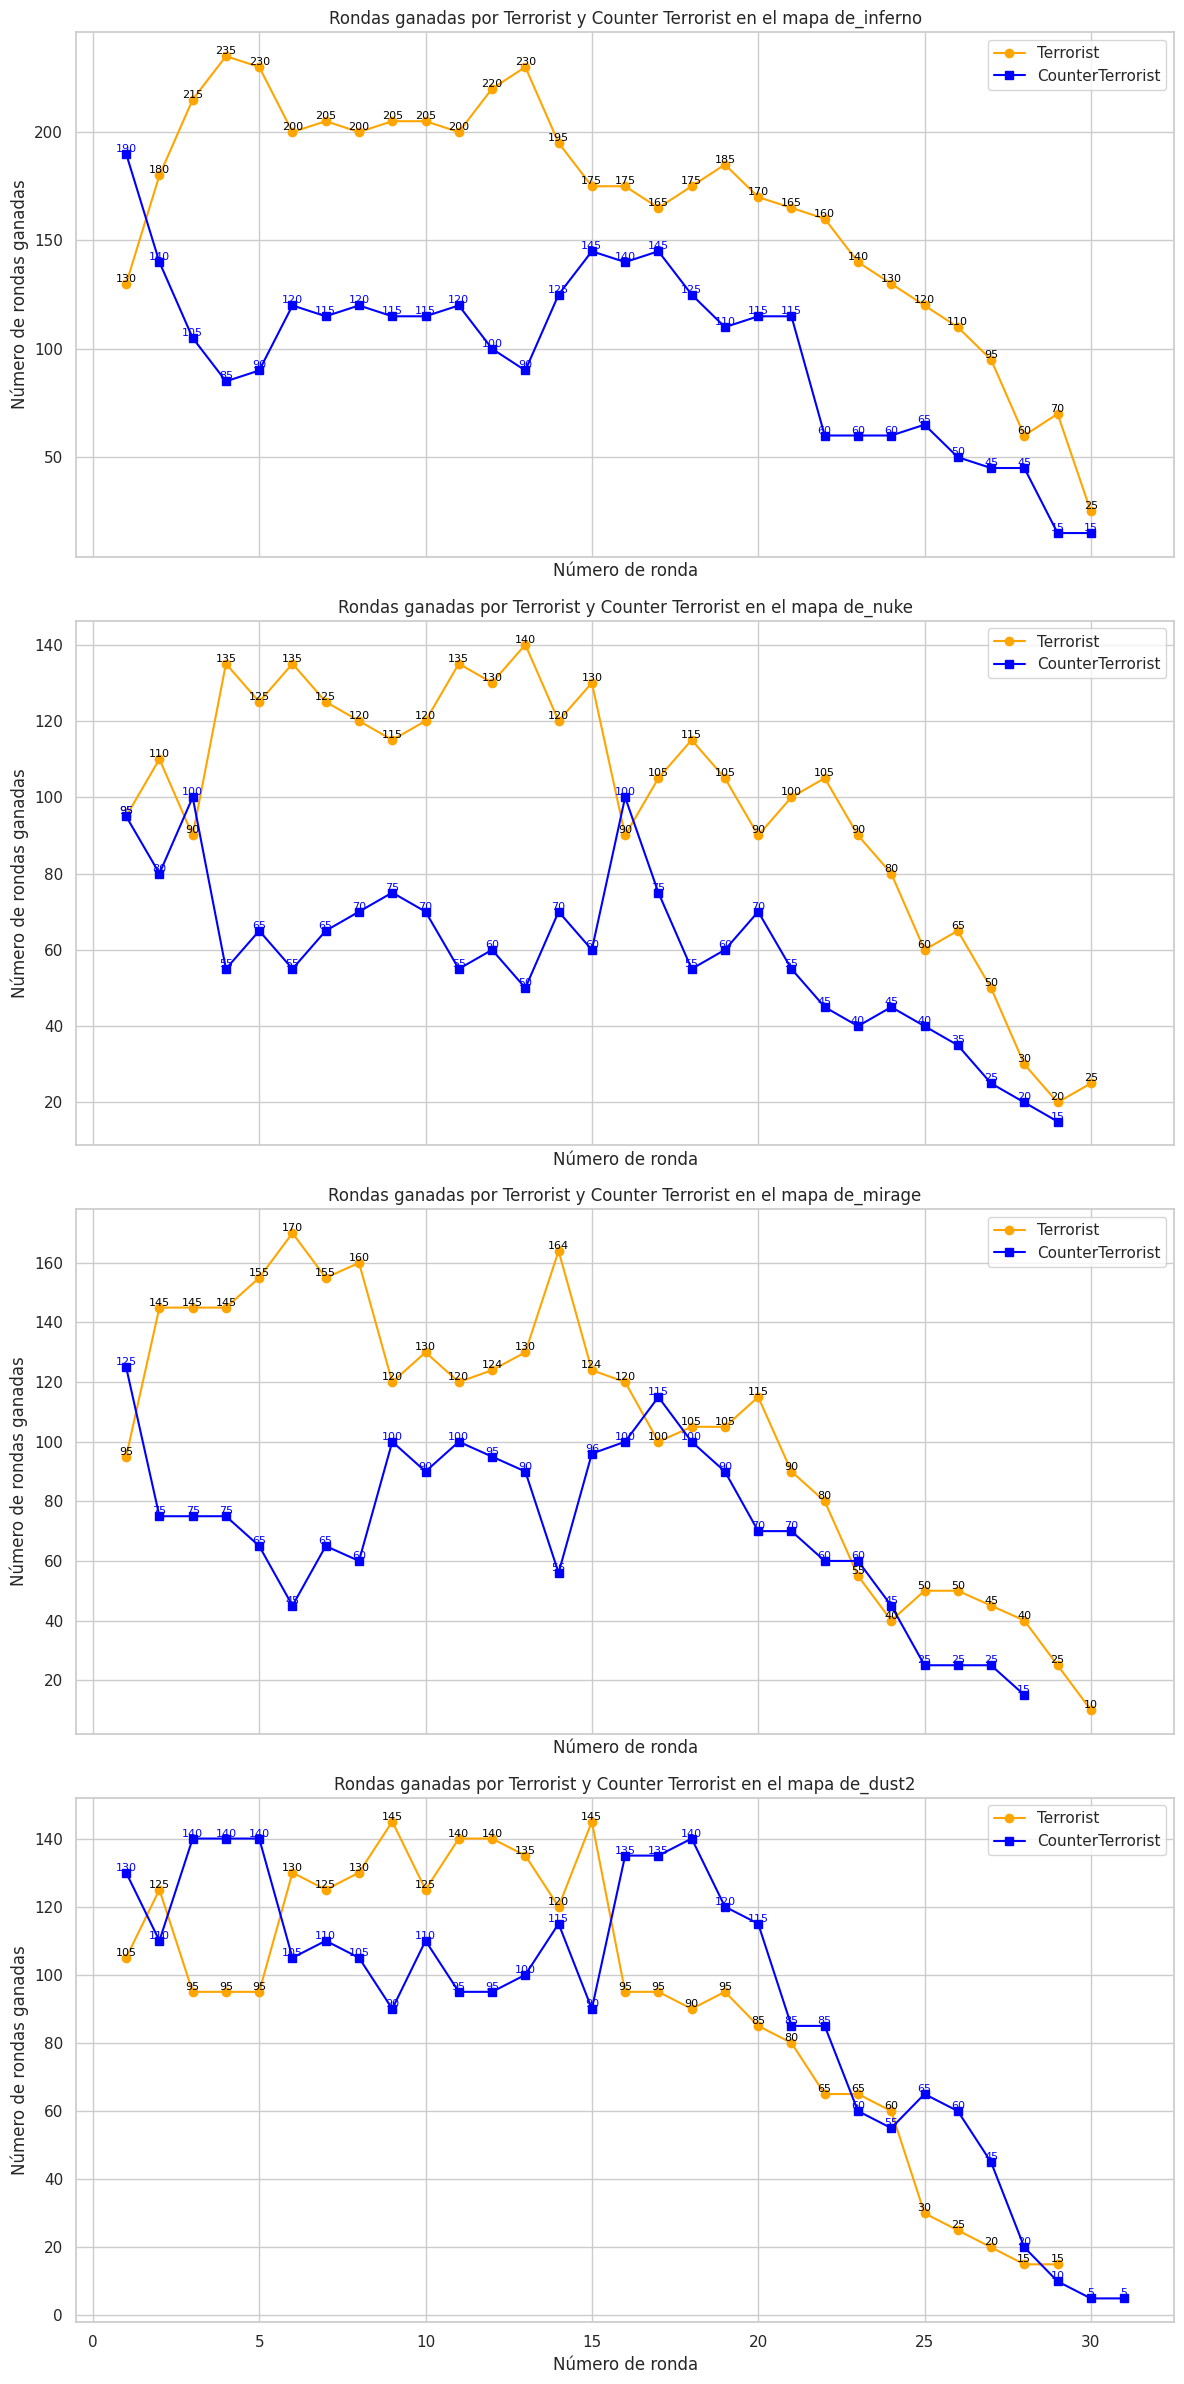

In [ ]:
columnas = ['Map', 'Team', 'MatchId', 'RoundId', 'RoundWinner']

datos_utilizados = df[columnas]

terrorist_wins = datos_utilizados[(datos_utilizados['RoundWinner'] == True) & (datos_utilizados['Team'] == 'Terrorist')]
ct_wins = datos_utilizados[(datos_utilizados['RoundWinner'] == True) & (datos_utilizados['Team'] == 'CounterTerrorist')]

maps = df['Map'].unique()
num_maps = len(maps)

fig, axs = plt.subplots(num_maps, 1, figsize=(12, 6*num_maps), sharex=True)

for i, map_name in enumerate(maps):
    terrorist_rounds = terrorist_wins[terrorist_wins['Map'] == map_name]['RoundId'].value_counts().sort_index()
    ct_rounds = ct_wins[ct_wins['Map'] == map_name]['RoundId'].value_counts().sort_index()
    axs[i].plot(terrorist_rounds.index, terrorist_rounds.values, label='Terrorist', marker='o', color='orange')
    axs[i].plot(ct_rounds.index, ct_rounds.values, label='CounterTerrorist', marker='s', color='blue')
    axs[i].set_title(f'Rondas ganadas por Terrorist y Counter Terrorist en el mapa {map_name}')
    axs[i].set_xlabel('Número de ronda')
    axs[i].set_ylabel('Número de rondas ganadas')
    axs[i].legend()
    axs[i].grid(True)
    for j, data in enumerate([terrorist_rounds, ct_rounds]):
        for x, y in zip(data.index, data.values):
            axs[i].text(x, y, f'{y}', ha='center', va='bottom', color='black' if j == 0 else 'blue', fontsize=8)

plt.tight_layout()
plt.show()

# Fase 3: Preparando los datos

Los datos son eliminados para lograr un correcto uso de los mismos, sacando de la problemática a la columna Unnamed ya que no es relevante para trabajar en la solución

In [ ]:
df_clean = df.dropna().drop(columns=['Unnamed: 0'])
print(df_clean.isna().sum())

Map                            0
Team                           0
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    0
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
TravelledDistance              0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int64


Según lo analizado y nuestras hipótesis podemos inferir que las siguientes columnas eliminadas no nos serán de utilidad a posteriori

In [ ]:
columnas_a_eliminar = ['AbnormalMatch', 'TravelledDistance', 'TimeAlive']
df = df.drop(columnas_a_eliminar, axis=1)

Con este código dejo solamente las rondas que son hasta un limite de 30

En este codigo vamos a limitar las rondas a 30 en todas las partidas, puesto que, debido al analisis previo de los datos, es mejor regularlas y generar un mejor promedio de duracion de partidas. Además que los datos que nos entregan las partidas mayores a 30 rounds no son tan relevantes para la invetsigación.

In [ ]:
df = df[df['RoundId'] <= 30]

Ahora procederemos a igualar los datos... Puesto que la columna InternalTeamId muchas veces no coincide con su Equipo o "lado" correspondiente.

In [ ]:
# Iterar sobre cada partido
for partida in df['MatchId'].unique():
    # Obtener los equipos para la primera ronda
    equipo_1 = df[(df['MatchId'] == partida) & (df['InternalTeamId'] == 1) & (df['RoundId'] == 1)]['Team'].values[0]
    equipo_2 = df[(df['MatchId'] == partida) & (df['InternalTeamId'] == 2) & (df['RoundId'] == 1)]['Team'].values[0]

    for ronda in range(1, 31):
        if ronda < 16:
            df.loc[(df['MatchId'] == partida) & (df['RoundId'] == ronda) & (df['InternalTeamId'] == 1), 'Team'] = equipo_1
            df.loc[(df['MatchId'] == partida) & (df['RoundId'] == ronda) & (df['InternalTeamId'] == 2), 'Team'] = equipo_2
        else:
            df.loc[(df['MatchId'] == partida) & (df['RoundId'] == ronda) & (df['InternalTeamId'] == 1), 'Team'] = equipo_2
            df.loc[(df['MatchId'] == partida) & (df['RoundId'] == ronda) & (df['InternalTeamId'] == 2), 'Team'] = equipo_1

Aquí cambiamos el tipo de dato de FirstKillTime a booleano para poder trabajar y manipularlo de mejor manera

In [ ]:
df['FirstKillTime'] = df['FirstKillTime'].astype(bool)


Ahora uso la columna previamente modificada para poder hacerla coincidir con RoundKills y RoundAssists. Esto ayudará a la consistencia de los datos.

In [ ]:
df.loc[df['FirstKillTime'] & (df['RoundKills'].isnull() | (df['RoundKills'] == 0)), 'RoundKills'] += 1

In [ ]:
# Crear un diccionario de mapeo
map_dict = {
    'de_inferno': 1,
    'de_nuke': 2,
    'de_mirage': 3,
    'de_dust2': 4
}

# Reemplazar los valores de la columna 'Map'
df['Map'] = df['Map'].replace(map_dict)



 

In [ ]:
# Eliminar filas con valores NaN en la columna 'MatchWinner'
df = df.dropna(subset=['MatchWinner'])

# Convertir 'MatchWinner' a valores numéricos (0 para 'False', 1 para 'True')
df['MatchWinner'] = df['MatchWinner'].astype(int)


In [ ]:
# Convertir valores booleanos a enteros
df['RoundWinner'] = df['RoundWinner'].astype(bool).astype(int)

# Verificar que la conversión haya sido exitosa
print(df['RoundWinner'].value_counts())


RoundWinner
1    55856
0    23190
Name: count, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79046 entries, 0 to 79156
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79046 non-null  int64  
 1   Map                          79046 non-null  int64  
 2   Team                         79046 non-null  object 
 3   InternalTeamId               79046 non-null  int64  
 4   MatchId                      79046 non-null  int64  
 5   RoundId                      79046 non-null  int64  
 6   RoundWinner                  79046 non-null  int64  
 7   MatchWinner                  79046 non-null  int64  
 8   Survived                     79046 non-null  bool   
 9   RLethalGrenadesThrown        79046 non-null  int64  
 10  RNonLethalGrenadesThrown     79046 non-null  int64  
 11  PrimaryAssaultRifle          79046 non-null  float64
 12  PrimarySniperRifle           79046 non-null  float64
 13  PrimaryHeavy         

In [ ]:
df.head(10)

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,RLethalGrenadesThrown,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,1,Terrorist,1,4,1,1,1,False,0,...,1,0,0,0,750,4400,0,0,0,0
1,601,1,Terrorist,1,4,1,1,1,False,0,...,1,0,0,0,800,4400,0,0,0,0
2,602,1,Terrorist,1,4,1,1,1,False,0,...,1,0,0,0,1000,4400,0,0,0,0
3,603,1,Terrorist,1,4,1,1,1,False,0,...,1,0,0,0,850,4400,0,0,0,0
4,604,1,Terrorist,1,4,1,1,1,True,1,...,1,0,0,0,1000,4400,0,0,0,0
5,605,1,CounterTerrorist,2,4,1,1,0,True,0,...,1,0,0,0,850,3750,0,0,0,0
6,606,1,CounterTerrorist,2,4,1,1,0,True,0,...,1,0,0,0,400,3750,0,0,0,0
7,607,1,CounterTerrorist,2,4,1,1,0,True,0,...,1,1,0,0,800,3750,0,0,1,0
8,608,1,CounterTerrorist,2,4,1,1,0,True,0,...,3,0,1,1,850,3750,3,1,0,1
9,609,1,CounterTerrorist,2,4,1,1,0,True,0,...,2,0,2,0,850,3750,2,0,0,2


# Fase 4: Modelando los datos

In [ ]:

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


Este es el DataFrame original para visualizar las variables que se encuentran.

In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId',
       'RoundWinner', 'MatchWinner', 'Survived', 'RLethalGrenadesThrown',
       'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle',
       'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime',
       'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots'],
      dtype='object')


## Regresión Lineal

Lo primero que hicimos fue cambiar las variables que iba a utilizar, para que pueda utilizar los datos acertados.

In [ ]:
# Reemplazar los valores de la columna 'Map' en el DataFrame original
df['Map'] = df['Map'].replace(map_dict)

# Crear nuevas columnas en el DataFrame nuevo
df_rondaspormapa = df.copy()  # Copiar el DataFrame original para evitar modificarlo
df_rondaspormapa['Map_1'] = df_rondaspormapa['Map'].apply(lambda x: 1 if x == 1 else 0)
df_rondaspormapa['Map_2'] = df_rondaspormapa['Map'].apply(lambda x: 1 if x == 2 else 0)
df_rondaspormapa['Map_3'] = df_rondaspormapa['Map'].apply(lambda x: 1 if x == 3 else 0)
df_rondaspormapa['Map_4'] = df_rondaspormapa['Map'].apply(lambda x: 1 if x == 4 else 0)
df_rondaspormapa['Team_CounterTerrorist'] = df_rondaspormapa['Team'].apply(lambda x: 1 if x == 'CounterTerrorist' else 0)
df_rondaspormapa['Team_Terrorist'] = df_rondaspormapa['Team'].apply(lambda x: 1 if x == 'Terrorist' else 0)

# Guardar el DataFrame df_rondaspormapa en un archivo CSV
df_rondaspormapa.to_csv('df_rondaspormapa.csv', index=False)


Aquí se verifica si todos los cambios fueron realizados correctamente.

In [ ]:
print(df_rondaspormapa.columns)

Index(['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId',
       'RoundWinner', 'MatchWinner', 'Survived', 'RLethalGrenadesThrown',
       'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle',
       'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime',
       'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots',
       'Map_1', 'Map_2', 'Map_3', 'Map_4', 'Team_CounterTerrorist',
       'Team_Terrorist'],
      dtype='object')


In [ ]:
# Seleccionar solo las columnas especificadas
df_selected_columns = df_rondaspormapa[['RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills', 
                                        'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 
                                        'Map_1', 'Map_2', 'Map_3', 'Map_4', 
                                        'Team_CounterTerrorist', 'Team_Terrorist', 'RoundWinner']]



¿Qué factores influyen en el resultado de un enfrentamiento en Counter-Strike? En este análisis, exploramos cómo diversas variables, como el desempeño individual de los jugadores y las tácticas empleadas por los equipos, pueden afectar el resultado final en este juego.

In [ ]:
#Importaciones utilizadas
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
# Seleccionar características relevantes
X = df_rondaspormapa[['RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills', 
                      'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 
                      'Map_1', 'Map_2', 'Map_3', 'Map_4', 
                      'Team_CounterTerrorist', 'Team_Terrorist']]  # Variables independientes
y = df_rondaspormapa['RoundWinner']  # Variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Inicializar el pipeline con StandardScaler y LinearRegression
model = make_pipeline(StandardScaler(), LinearRegression())

# Definir los parámetros que deseas probar
parameters = {'linearregression__fit_intercept': [True, False]}

In [ ]:
# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)
# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [ ]:
# Obtener los mejores parámetros encontrados por GridSearchCV
best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)

Mejores parámetros: {'linearregression__fit_intercept': True}


In [ ]:
# Obtener el mejor modelo encontrado
best_model = grid_search.best_estimator_

# Predecir sobre los datos de prueba
y_pred_best = best_model.predict(X_test)

In [ ]:
# Calcular el error cuadrático medio y el coeficiente de determinación (R^2) con los mejores parámetros
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

In [ ]:
# Imprimir los resultados
print("Mejor error cuadrático medio:", mse_best)
print("Mejor coeficiente de determinación (R^2):", r2_best)

Mejor error cuadrático medio: 0.18970584300933951
Mejor coeficiente de determinación (R^2): 0.08043802765723995


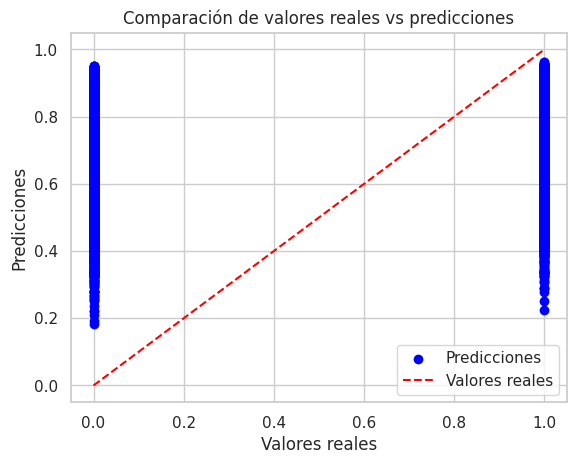

In [ ]:
# Visualización: Comparar predicciones con datos reales
plt.scatter(y_test, y_pred_best, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Valores reales')
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Comparación de valores reales vs predicciones")
plt.legend()
plt.show()


Al emplear técnicas de regresión lineal, hemos identificado ciertas características que pueden tener un impacto en el resultado de los enfrentamientos en Counter-Strike. Con un error cuadrático medio cercano a 0.1897 y un coeficiente de determinación (R^2) de aproximadamente 0.0804, nuestros hallazgos sugieren que el modelo proporciona una representación aceptable de la dinámica de juego.

## Decision Tree Regressor

El árbol de decisión creado utiliza las características "Map" e "InternalTeamId" para predecir quién ganará la partida en Counter Strike. Cada nodo del árbol representa una pregunta sobre una característica específica, como el mapa jugado o el equipo interno asignado, y las hojas del árbol representan las predicciones de quién será el ganador basado en esas características. Este árbol nos proporciona una estructura clara de cómo el modelo toma decisiones para predecir los resultados de las partidas.

Mean Squared Error: 0.2428998363656609
          Feature  Importance
0             Map    0.725566
1  InternalTeamId    0.274434


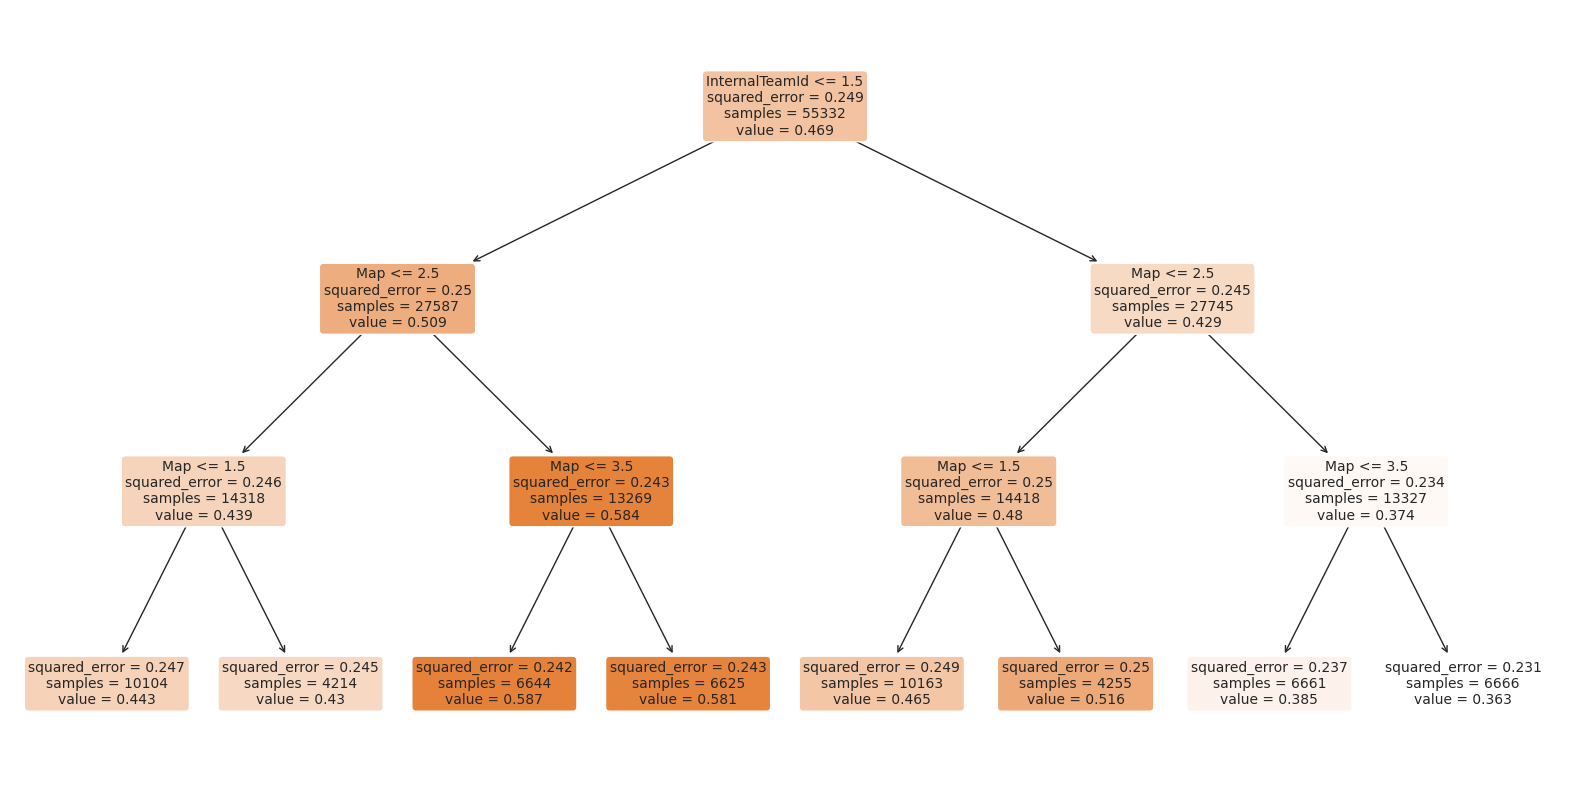

In [ ]:
# Seleccionamos las características y la variable objetivo
X = df[['Map', 'InternalTeamId']]
y = df['MatchWinner']

# Convertimos variables categóricas a numéricas
X = pd.get_dummies(X)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamos el modelo de árbol de decisión de regresión
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Hacemos predicciones
y_pred = model.predict(X_test)

# Evaluamos el modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Imprimimos las características importantes
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
print(importance_df)

# Graficamos el árbol de decisión
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.show()

Random Forest

Se utlizará el modelo random forest para evaluar nuestras predicciones de los datos y cuan asertivas pueden ser

In [ ]:
X = df[['Map', 'InternalTeamId']]
y = df['MatchWinner']

# Convertimos variables categóricas a numéricas
X = pd.get_dummies(X)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print('numero muestras en y:', np.bincount(y))
print('numero muestras en y_train:', np.bincount(y_train))
print('numero muestras en y_test:', np.bincount(y_test))

numero muestras en y: [41962 37084]
numero muestras en y_train: [29342 25990]
numero muestras en y_test: [12620 11094]


In [ ]:
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
reg = RandomForestRegressor()
reg.fit(X_train,y_train)

RandomForestRegressor()

Aqui podemos ver los errores cuadráticos antes del entreno del modelo

In [ ]:
y_pred_train = reg.predict(X_train)
print('error absoluto',mean_absolute_error(y_train,y_pred_train))
y_pred_test = reg.predict(X_test)
print('error absoluto test',mean_squared_error(y_test,y_pred_test))

error absoluto 0.4861397560297883
error absoluto test 0.24317241788150395


Le damos la cantidad de datos necesarios para poder concretar un buen entrenamiento del modelo al random forest

In [ ]:
prm = {
    'n_estimators': [900],
    'max_depth': [1000],
    'max_features':['sqrt']
}
reg1 = RandomForestRegressor()
reg1 = GridSearchCV(reg1,prm)

Entrenamos el modelo, este modelo se demora un poco en cargar aprox 1 min.

In [ ]:
reg1.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1000], 'max_features': ['sqrt'],
                         'n_estimators': [900]})

Y, finalmente, estos nos los números y errores cuadráticos resultantes post entreno

In [ ]:
y_pred_train = reg1.predict(X_train)
print('error absoluto train',mean_squared_error(y_train,y_pred_train))
y_pred_test = reg1.predict(X_test)
print('error absoluto test',mean_squared_error(y_test,y_pred_test))

error absoluto train 0.2431126405533712
error absoluto test 0.2431684445933294


# Fase 5 Deployment

## Probando Modelo Seleccionado

Hemos decidido en base a los resultados proporcionados por los 3 modelos de regresión trabajados anteriormente, cuyo MSE (Mean Squared Error) era capaz de medir cual modelo era mejor mientras menor sea su valor, la regresión lineal nos proporcionó el menor MSE por lo tanto trabajaremos con ella y lo probaremos como funciona.

In [ ]:
from sklearn.impute import SimpleImputer 
import pandas as pd

In [ ]:
# Crear un diccionario para mapear los nombres de los mapas a sus correspondientes columnas
map_dict = {
    'de_inferno': [1, 0, 0, 0],
    'de_nuke': [0, 1, 0, 0],
    'de_mirage': [0, 0, 1, 0],
    'de_dust2': [0, 0, 0, 1]
}
# Nuevos datos a insertar, inserta 3 datos de prueba
new_data = pd.DataFrame({
    'RoundKills': [2, 3, 1],
    'RoundAssists': [1, 0, 2],
    'RoundHeadshots': [1, 1, 0],
    'RoundFlankKills': [0, 1, 0],
    'RoundStartingEquipmentValue': [1500, 2000, 1000],
    'TeamStartingEquipmentValue': [7000, 1000, 4500],
    'Map': ['de_inferno', 'de_nuke', 'de_dust2'],
    'Team': ['Terrorist', 'CounterTerrorist', 'CounterTerrorist']
})


In [ ]:
# Expandir los valores de los mapas a columnas separadas
map_columns = ['Map_1', 'Map_2', 'Map_3', 'Map_4']
for col in map_columns:
    new_data[col] = 0

for i, row in new_data.iterrows():
    map_values = map_dict[row['Map']]
    new_data.at[i, 'Map_1'] = map_values[0]
    new_data.at[i, 'Map_2'] = map_values[1]
    new_data.at[i, 'Map_3'] = map_values[2]
    new_data.at[i, 'Map_4'] = map_values[3]

# Expandir los valores del equipo a columnas separadas
new_data['Team_CounterTerrorist'] = new_data['Team'].apply(lambda x: 1 if x == 'CounterTerrorist' else 0)
new_data['Team_Terrorist'] = new_data['Team'].apply(lambda x: 1 if x == 'Terrorist' else 0)


In [ ]:
# Seleccionar solo las columnas necesarias para las predicciones
new_data = new_data[['RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills', 
                     'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 
                     'Map_1', 'Map_2', 'Map_3', 'Map_4', 
                     'Team_CounterTerrorist', 'Team_Terrorist']]

# Imputar los valores faltantes en los nuevos datos 
imputer = SimpleImputer(strategy='mean')
new_data_imputed = imputer.fit_transform(new_data)

# Hacer predicciones con el modelo entrenado y los datos imputados
new_predictions = best_model.predict(new_data_imputed)

# Crear un DataFrame con las características seleccionadas y las predicciones
new_data_predictions = pd.DataFrame(new_data_imputed, columns=new_data.columns)
new_data_predictions['Predictions'] = new_predictions


/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Mostrar solo los datos creados recientemente con sus predicciones
print("Nuevos datos insertados y sus predicciones:")
for i, row in new_data_predictions.iterrows():
    print(f"El valor agregado {i + 1} tuvo una predicción de ganar la ronda de {row['Predictions']:.4f}")

# Insertar los nuevos datos y sus predicciones en df_predictions
# Definir df_predictions como un DataFrame vacío si aún no está definido
try:
    df_predictions
except NameError:
    df_predictions = pd.DataFrame()

# Insertar los nuevos datos y sus predicciones en df_predictions
df_predictions = pd.concat([df_predictions, new_data_predictions], ignore_index=True)

Nuevos datos insertados y sus predicciones:
El valor agregado 1 tuvo una predicción de ganar la ronda de 0.7236
El valor agregado 2 tuvo una predicción de ganar la ronda de 0.5745
El valor agregado 3 tuvo una predicción de ganar la ronda de 0.6942


In [ ]:
# Mostrar el DataFrame con las predicciones actualizadas (solo las últimas filas para ver los datos recién agregados)
print("DataFrame completo con las predicciones actualizadas (últimas filas):")
print(df_predictions.tail())

DataFrame completo con las predicciones actualizadas (últimas filas):
   RoundKills  RoundAssists  RoundHeadshots  RoundFlankKills  \
0         2.0           1.0             1.0              0.0   
1         3.0           0.0             1.0              1.0   
2         1.0           2.0             0.0              0.0   

   RoundStartingEquipmentValue  TeamStartingEquipmentValue  Map_1  Map_2  \
0                       1500.0                      7000.0    1.0    0.0   
1                       2000.0                      1000.0    0.0    1.0   
2                       1000.0                      4500.0    0.0    0.0   

   Map_3  Map_4  Team_CounterTerrorist  Team_Terrorist  Predictions  
0    0.0    0.0                    0.0             1.0     0.723637  
1    0.0    0.0                    1.0             0.0     0.574452  
2    0.0    1.0                    1.0             0.0     0.694157  


# Fase 5: Evaluation

In [ ]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 23.0.1 -> 24.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
!pip install xgboost


[notice] A new release of pip is available: 23.0.1 -> 24.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from scipy.stats import randint
import matplotlib.pyplot as plt
import seaborn as sns

## Matriz de Confusion

¿Cómo podemos predecir de manera efectiva el equipo ganador en partidas de Counter-Strike basándonos en estadísticas específicas de jugadores y características del mapa?, para abordar esta pregunta vamos a crear un modelo de clasificación enfocándonos en una matriz de confusión donde crearemos un modelo de entrenamiento donde evaluaremos su capacidad para distinguir entre los equipos Terrorist y Counter-Terrorist. Utilizaremos características como el número de muertes (MatchKills), el mapa en el que se juega (Map).

Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=64, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=64, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estimators=132, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estimators=132, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=149, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=149, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=137, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=137, subsample=0.8; total time=   0.3s
[CV] END colsampl

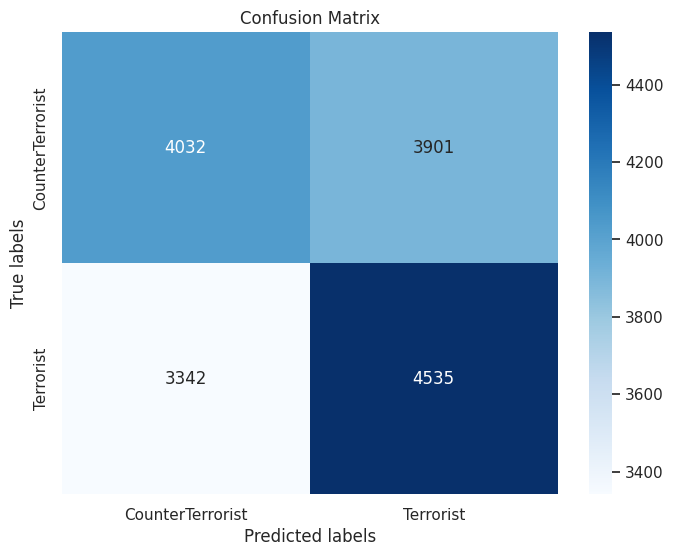

Matriz de Confusión:
[[4032 3901]
 [3342 4535]]

Descripción de la Matriz de Confusión:
Verdaderos Positivos : 4032 Casos correctamente identificados como Terroristas.
Falsos Positivos : 3901 Casos incorrectamente identificados como Contra-Terroristas.
Falsos Negativos : 3342 Casos incorrectamente identificados como Terroristas.
Verdaderos Negativos : 4535 Casos correctamente identificados como Contra-Terroristas.

              precision    recall  f1-score   support

           0       0.55      0.51      0.53      7933
           1       0.54      0.58      0.56      7877

    accuracy                           0.54     15810
   macro avg       0.54      0.54      0.54     15810
weighted avg       0.54      0.54      0.54     15810



In [ ]:
# Seleccionar las características y la variable objetivo
X = df[['MatchKills', 'Map']]
y = df['Team']

# Convertir las etiquetas de clase a valores numéricos
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Balancear las clases usando SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de XGBoost
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)

# Definir los parámetros para el Randomized Search
param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': randint(3, 10),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

# Configurar el Randomized Search
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=20, cv=2, random_state=42, n_jobs=-1, verbose=2)

# Entrenar el modelo con el Randomized Search
random_search.fit(X_train_scaled, y_train_bal)

# Mejor modelo encontrado por el Randomized Search
best_xgb_model = random_search.best_estimator_

# Realizar predicciones con el mejor modelo
y_pred_best_xgb = best_xgb_model.predict(X_test_scaled)

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred_best_xgb)

# Evaluar el modelo
print("Best XGBoost Classifier with Randomized Search")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print("Matriz de Confusión:")
cm = confusion_matrix(y_test, y_pred_best_xgb)
print(cm)

print("\nDescripción de la Matriz de Confusión:")
print("Verdaderos Positivos : 4032 Casos correctamente identificados como Terroristas.")
print("Falsos Positivos : 3901 Casos incorrectamente identificados como Contra-Terroristas.")
print("Falsos Negativos : 3342 Casos incorrectamente identificados como Terroristas.")
print("Verdaderos Negativos : 4535 Casos correctamente identificados como Contra-Terroristas.\n")


print(classification_report(y_test, y_pred_best_xgb))

El modelo predice correctamente el 55% de las veces cuando identifica a los Terroristas y el 54% cuando identifica a los Counter-Terrorist. 

El modelo logra un equilibrio en la predicción entre los equipos Terrorist y Counter-Terrorist, con métricas de precisión y recall cercanas para ambas clases. 

In [ ]:
!pip install pandas scikit-learn graphviz matplotlib



[notice] A new release of pip is available: 23.0.1 -> 24.1
[notice] To update, run: pip install --upgrade pip


## Árbol de decisiones (Clasificación)

El modelo de árbol de decisiones utiliza características como el mapa, el ganador de la ronda previa (RoundWinner), y la identificación del equipo (InternalTeamId) para predecir quién ganará la partida basado en patrones históricos de juego. El árbol de decisiones se construye formando preguntas sobre estas características, y las respuestas a estas preguntas conducen a predicciones sobre el resultado del juego. Esto permite al modelo aprender y tomar decisiones secuenciales para prever el resultado de las partidas en el juego.

Accuracy: 0.5867805186590765


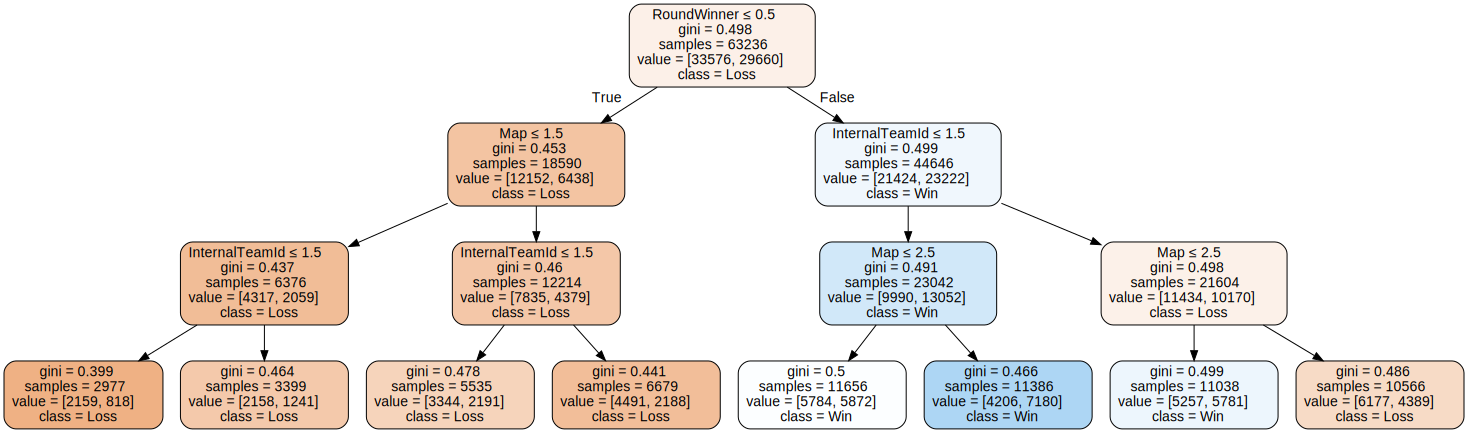

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import graphviz

# Supongamos que ya tenemos los datos cargados en un DataFrame llamado df
# df = pd.read_csv('path_to_csv_file.csv')

# Convertir la columna 'Team' a numérica
label_encoder = LabelEncoder()
df['Team'] = label_encoder.fit_transform(df['Team'])

# Seleccionar las características relevantes
selected_features = ['Map', 'RoundWinner', 'InternalTeamId']

X = df[selected_features]
y = df['MatchWinner']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de árbol de decisiones
clf = DecisionTreeClassifier(random_state=42, max_depth=3)  # Limitar la profundidad del árbol para simplificarlo
clf.fit(X_train, y_train)

# Hacer predicciones
y_pred = clf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualización del árbol de decisiones
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=selected_features,  
                           class_names=['Loss', 'Win'],  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph


Accuracy of K-NN classifier on training set: 0.57
Accuracy of K-NN classifier on test set: 0.57
Accuracy: 0.5712839974699557
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.62      0.60      8386
           1       0.55      0.52      0.53      7424

    accuracy                           0.57     15810
   macro avg       0.57      0.57      0.57     15810
weighted avg       0.57      0.57      0.57     15810



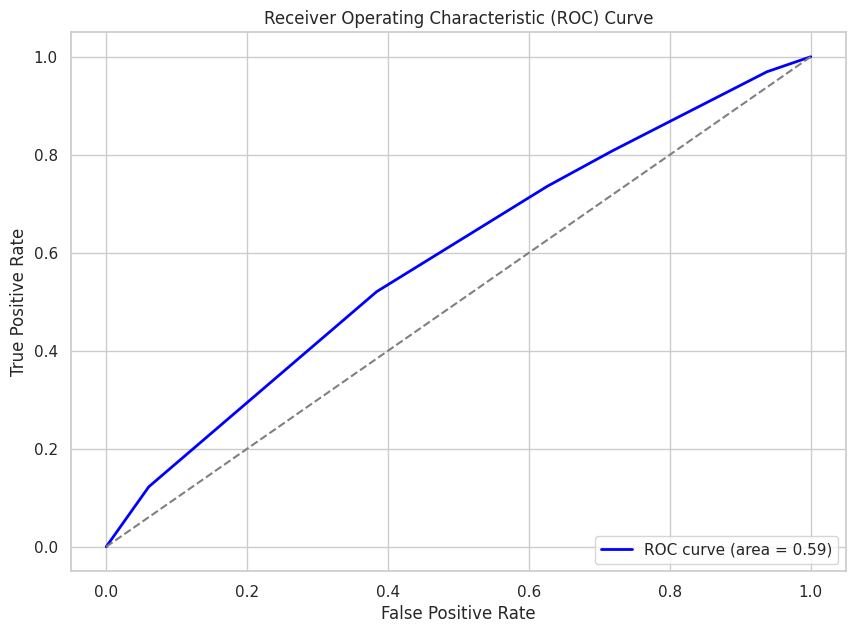

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
n_neighbors = 7

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

from sklearn.metrics import roc_curve, roc_auc_score

# Calcular las probabilidades de predicción para la clase positiva
y_prob = knn.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Graficar la curva ROC
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Conclusión

Con base en los resultados obtenidos de los tres modelos de clasificación evaluados, donde la matriz de confusión tuvo un accuracy de 0.54, el árbol de decisiones obtuvo 0.58 y el clasificador KNeighbors alcanzó 0.57, se concluyó que el árbol de decisiones fue el que proporcionó la mejor precisión entre los tres modelos probados. Esto sugiere que el árbol de decisiones es el más efectivo para predecir el resultado deseado en este contexto específico de clasificación. 

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

# Datos nuevos para realizar predicciones
data_new = {
    'Map': ['de_dust2', 'de_inferno', 'de_mirage', 'de_nuke'],
    'RoundWinner': [1, 0, 1, 0],  # Ejemplo de datos numéricos (1 para True, 0 para False)
    'InternalTeamId': [1, 2, 1, 2]
}

# Convertir los datos a un DataFrame
df_new = pd.DataFrame(data_new)

# One-Hot Encoding para 'Map'
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_map_encoded = one_hot_encoder.fit_transform(df_new[['Map']])

# Crear DataFrame con las nuevas características
X_new = pd.concat([pd.DataFrame(X_map_encoded), df_new[['RoundWinner', 'InternalTeamId']]], axis=1)

# Cargar el modelo previamente entrenado (asegúrate de haber ejecutado el código de entrenamiento antes)
clf = DecisionTreeClassifier(random_state=42, max_depth=3)

# Entrenar el modelo con datos de entrenamiento simulados
# Supongamos que tenemos un conjunto de entrenamiento similar para ilustrar
X_train = pd.DataFrame({
    'Map': ['de_dust2', 'de_inferno', 'de_mirage', 'de_nuke'],  # Ejemplo de datos de entrenamiento
    'RoundWinner': [1, 0, 1, 0],  # Ejemplo de datos de entrenamiento (numéricos)
    'InternalTeamId': [1, 2, 1, 2]  # Ejemplo de datos de entrenamiento
})
y_train = pd.Series([1, 0, 1, 0])  # Etiquetas correspondientes a los datos de entrenamiento

# One-Hot Encoding para 'Map' en el conjunto de entrenamiento
X_train_map_encoded = one_hot_encoder.transform(X_train[['Map']])

# Crear DataFrame con las características de entrenamiento codificadas
X_train_encoded = pd.concat([pd.DataFrame(X_train_map_encoded), X_train[['RoundWinner', 'InternalTeamId']]], axis=1)

# Entrenar el modelo con los datos de entrenamiento codificados
clf.fit(X_train_encoded, y_train)

# One-Hot Encoding para 'Map' en los nuevos datos
X_new_map_encoded = one_hot_encoder.transform(df_new[['Map']])

# Crear DataFrame con las características de los nuevos datos codificados
X_new_encoded = pd.concat([pd.DataFrame(X_new_map_encoded), df_new[['RoundWinner', 'InternalTeamId']]], axis=1)

# Realizar predicciones
y_pred_new = clf.predict(X_new_encoded)

# Mostrar las predicciones
print("Predicciones para los nuevos datos:")
print(y_pred_new)


Predicciones para los nuevos datos:
[1 0 1 0]
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0dc2b196-0d77-49a8-a4c7-4b7790a324b8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>